In [1]:
import pylab as plb
from os import chdir
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


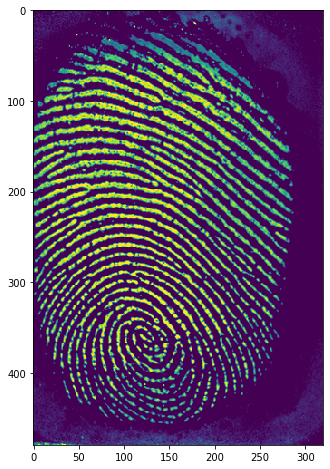

In [18]:
imgOrg = plb.imread('/content/drive/My Drive/traitement_signal/Empreinte_appareil.bmp')
plb.figure(figsize=(12,8))
plb.imshow(imgOrg)
plb.show()

In [0]:

img = plb.imread("/content/drive/My Drive/traitement_signal/Empreinte_tissu.jpg")

In [3]:
print('type : {0}, code : {1}, dimension : {2}, taille : {3}'.format(type(img), img.dtype, img.ndim, img.shape))

type : <class 'numpy.ndarray'>, code : uint8, dimension : 3, taille : (2162, 1692, 3)


In [0]:
lx, ly = img.shape[0], img.shape[1]

<function matplotlib.pyplot.plot>

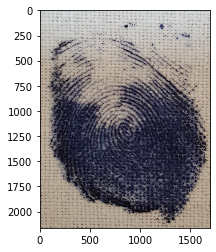

In [5]:
plb.figure(figsize=(12,4))
plb.imshow(img)
plb.plot

In [0]:
from skimage import io
gray= io.imread("/content/drive/My Drive/traitement_signal/Empreinte_tissu.jpg", as_gray=True)

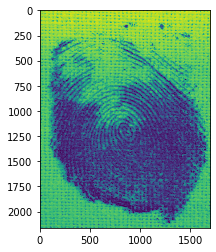

In [7]:

plb.imshow(gray)
plb.show()

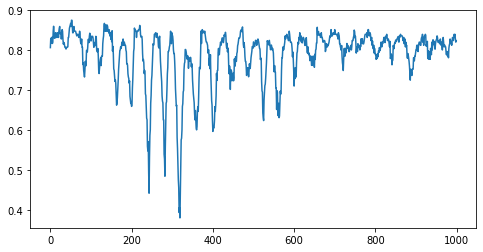

In [8]:
import numpy as np 
import pylab as plb

x=np.ravel(gray)
plb.figure(figsize=(8,4))
plb.plot(x[500:1500])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


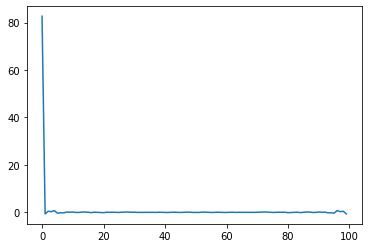

In [9]:
A = np.fft.fft(x[500:600])
plb.plot(A)

In [0]:
# fft

imgfft = plb.zeros((lx, ly, 3), dtype = plb.complex64)
for i in range (3):
    imgfft[:,:,i] = plb.fft2(img[:,:,i])
    imgfft[:,:,i] = plb.fftshift(imgfft[:,:,i])
imgfft_filtre = plb.copy(imgfft)

In [0]:
# filtres
# filtre basse-pas : on garde les petites fréquences spatiales

maskPB = plb.zeros((lx, ly), dtype = bool)
for i in range(lx):
    for j in range(ly):
        maskPB[i,j] = ((i - lx / 2) ** 2 + (j - ly / 2) ** 2 > lx * ly / 200)

In [0]:
# filtres
# filtre pass-haut

maskPH = plb.zeros((lx, ly), dtype = bool)
maskPH[int( lx / 2),int(ly / 2) ]=True

In [0]:
# application du mask : là ou mask = True, affecter la nouvelle valeur
imgfft_filtre[maskPB] = [0,0,0]

In [0]:
# application du mask : là ou mask = True, affecter la nouvelle valeur
imgfft_filtre[maskPH] = [0,0,0]

In [15]:
# fft_inverse

imginv = plb.zeros((lx, ly, 3), dtype = plb.float32)
for i in range(3):
    imginv[:,:,i] = plb.ifft2(plb.ifftshift(imgfft_filtre[:,:,i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

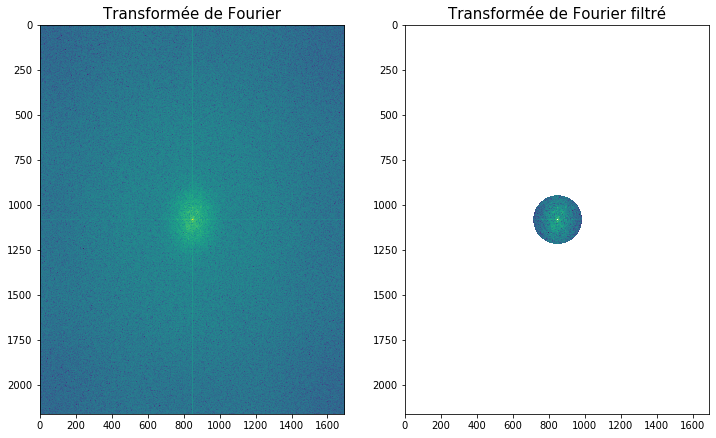

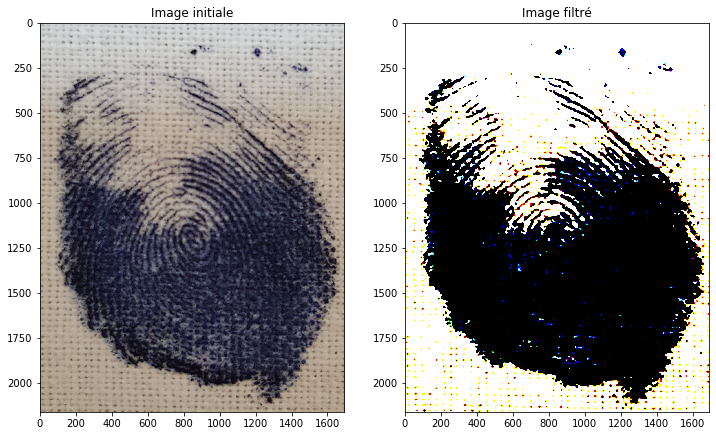

In [16]:
# Affichage

fig1 = plb.figure(figsize=(12,8))
axe11 = fig1.add_subplot(121)
axe11.imshow(plb.log10(plb.absolute(imgfft[:,:,0])))
axe11.set_title('Transformée de Fourier', fontsize = 15)

axe12 = fig1.add_subplot(122)
axe12.imshow(plb.log10(plb.absolute(imgfft_filtre[:,:,0])))
axe12.set_title('Transformée de Fourier filtré', fontsize = 15)


fig2 = plb.figure(figsize=(12,8))

axe21 = fig2.add_subplot(121)
axe21.imshow(img)
axe21.set_title('Image initiale')

axe22 = fig2.add_subplot(122)
axe22.imshow(imginv)
axe22.set_title('Image filtré')


plb.show

In [0]:
# Applique l'egalization sur l'histogramme de l'image filtrée afin d'améliorer la qualité de l'image filtrée si possible 
import cv2
import numpy as np

def equalize_hist(img):
    for c in xrange(1, 1):
       img[:,:,c] = cv2.equalizeHist(img[:,:,c])

    cv2.imshow('Histogram equalized', img)
    cv2.waitKey(0)

    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


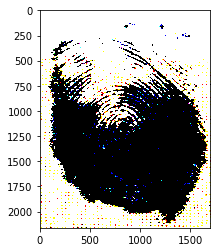

In [20]:
plb.imshow(imginv)
plb.show()